In [ ]:
# imports
import nltk
from gensim.models import Word2Vec, FastText
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\erez1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## 1. a,b,c

In [3]:
def train_word2vec_model(sentences, sg, window_size, epochs=150):    
    model = Word2Vec(sentences, window=window_size, min_count=1, sg=sg, epochs=epochs, workers=2, seed=42)
    return model

In [4]:
sentences = ["The bank is located near the river.", 
             "The bank approved my loan application.", 
             "He rose from his chair to close the window.", 
             "The rose bloomed beautifully in the garden.", 
             "The lead actor delivered a stunning performance.", 
             "Exposure to lead is harmful to health.", 
             "She is reading a book in the library.",
             "The book mentioned a fascinating historical event.", 
             "I need to file a report for my manager.", 
             "He lost the file containing important documents."]
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized sentences:", tokenized_sentences)

Tokenized sentences: [['the', 'bank', 'is', 'located', 'near', 'the', 'river', '.'], ['the', 'bank', 'approved', 'my', 'loan', 'application', '.'], ['he', 'rose', 'from', 'his', 'chair', 'to', 'close', 'the', 'window', '.'], ['the', 'rose', 'bloomed', 'beautifully', 'in', 'the', 'garden', '.'], ['the', 'lead', 'actor', 'delivered', 'a', 'stunning', 'performance', '.'], ['exposure', 'to', 'lead', 'is', 'harmful', 'to', 'health', '.'], ['she', 'is', 'reading', 'a', 'book', 'in', 'the', 'library', '.'], ['the', 'book', 'mentioned', 'a', 'fascinating', 'historical', 'event', '.'], ['i', 'need', 'to', 'file', 'a', 'report', 'for', 'my', 'manager', '.'], ['he', 'lost', 'the', 'file', 'containing', 'important', 'documents', '.']]


In [5]:
# try both skip-gram and CBOW
cbow_model = train_word2vec_model(tokenized_sentences, sg=0, window_size=3)
sg_model = train_word2vec_model(tokenized_sentences, sg=1, window_size=3)

## 1.d

In [11]:
def calculate_similarity(word, cbow_model, sg_model):
    cbow_vector = cbow_model.wv[word]
    sg_vector = sg_model.wv[word]
    cosine_sim = cosine_similarity(cbow_vector.reshape(1, -1), sg_vector.reshape(1, -1))
    return cosine_sim[0][0]

def get_embeddings_similarity(cbow_model, sg_model):
    similarity_per_token = {}
    for sentence in tokenized_sentences:
        for token in sentence:
            similarity = calculate_similarity(token, cbow_model, sg_model)
            similarity_per_token[token] = similarity
    return similarity_per_token

def get_most_similar_embeddings(cbow_model, sg_model):
    similarity_per_token = get_embeddings_similarity(cbow_model, sg_model)
    most_similar_embeddings = sorted(similarity_per_token.items(), key=lambda x: x[1], reverse=True)[:10]
    print("The most similar embeddings between CBOW and Skip-gram models are: ", most_similar_embeddings)

In [13]:
# the difference between the models on each token
print(get_embeddings_similarity(cbow_model, sg_model))

{'the': 0.96450263, 'bank': 0.90237683, 'is': 0.89742625, 'located': 0.9291422, 'near': 0.9399378, 'river': 0.8926098, '.': 0.9640477, 'approved': 0.96861017, 'my': 0.88274944, 'loan': 0.92010915, 'application': 0.9270045, 'he': 0.8928302, 'rose': 0.9424402, 'from': 0.8979327, 'his': 0.9245022, 'chair': 0.9166998, 'to': 0.9632003, 'close': 0.94737667, 'window': 0.9492069, 'bloomed': 0.9562955, 'beautifully': 0.9413059, 'in': 0.8872272, 'garden': 0.93698025, 'lead': 0.92818147, 'actor': 0.8966482, 'delivered': 0.8933069, 'a': 0.9393356, 'stunning': 0.89599556, 'performance': 0.91019404, 'exposure': 0.95134217, 'harmful': 0.92996186, 'health': 0.8638738, 'she': 0.93199897, 'reading': 0.95338136, 'book': 0.91429466, 'library': 0.94898564, 'mentioned': 0.919379, 'fascinating': 0.9435926, 'historical': 0.9287566, 'event': 0.9360674, 'i': 0.9141132, 'need': 0.87402284, 'file': 0.9229257, 'report': 0.9319524, 'for': 0.9113668, 'manager': 0.8415194, 'lost': 0.9315098, 'containing': 0.90864754,

### The main difference between CBOW and Skip-gram is that CBOW predicts the target word from the context words, while Skip-gram predicts the context words from the target word.
### Because the amount of sentences and the vocabulary size we have trained on isn't big (only 10 sentences), we see that most of the words have similar Vecs between the models, using cosine similarity.

## 1.e The most similar embeddings between the models are:

In [14]:
get_most_similar_embeddings(cbow_model, sg_model)

The most similar embeddings between CBOW and Skip-gram models are:  [('approved', 0.96861017), ('the', 0.96450263), ('.', 0.9640477), ('to', 0.9632003), ('bloomed', 0.9562955), ('reading', 0.95338136), ('exposure', 0.95134217), ('window', 0.9492069), ('library', 0.94898564), ('close', 0.94737667)]


## 1.f

In [15]:
# check similarity between the models in certain window size
def check_similarity_in_window_size(window):
    cbow_model_window = train_word2vec_model(tokenized_sentences, sg=0, window_size=window)
    sg_model_window = train_word2vec_model(tokenized_sentences, sg=1, window_size=window)
    print(f"Word embeddings with window size {window}:")
    print(get_embeddings_similarity(cbow_model_window, sg_model_window))
    # print(f"Most similar embeddings with window size {window}:")
    # get_most_similar_embeddings(cbow_model_window, sg_model_window)

In [9]:
# original window size
check_similarity_in_window_size(3)
# with window size 5
check_similarity_in_window_size(5)
# with window size 7
check_similarity_in_window_size(7)
# with window size 9
check_similarity_in_window_size(9)

Word embeddings with window size 3:
{'the': 0.96450263, 'bank': 0.90237683, 'is': 0.89742625, 'located': 0.9291422, 'near': 0.9399378, 'river': 0.8926098, '.': 0.9640477, 'approved': 0.96861017, 'my': 0.88274944, 'loan': 0.92010915, 'application': 0.9270045, 'he': 0.8928302, 'rose': 0.9424402, 'from': 0.8979327, 'his': 0.9245022, 'chair': 0.9166998, 'to': 0.9632003, 'close': 0.94737667, 'window': 0.9492069, 'bloomed': 0.9562955, 'beautifully': 0.9413059, 'in': 0.8872272, 'garden': 0.93698025, 'lead': 0.92818147, 'actor': 0.8966482, 'delivered': 0.8933069, 'a': 0.9393356, 'stunning': 0.89599556, 'performance': 0.91019404, 'exposure': 0.95134217, 'harmful': 0.92996186, 'health': 0.8638738, 'she': 0.93199897, 'reading': 0.95338136, 'book': 0.91429466, 'library': 0.94898564, 'mentioned': 0.919379, 'fascinating': 0.9435926, 'historical': 0.9287566, 'event': 0.9360674, 'i': 0.9141132, 'need': 0.87402284, 'file': 0.9229257, 'report': 0.9319524, 'for': 0.9113668, 'manager': 0.8415194, 'lost': 

### We can see that the cosine similarity of the words is significantly decreasing between the models when increasing the window size - because it strengths the unique functionality of each model

## 1.g

In [21]:
def compare_words_similarity(cbow_model, sg_model, words_dict):
    for word1, word2 in words_dict.items():
        cbow_similarity = cbow_model.wv.similarity(word1, word2)
        sg_similarity = sg_model.wv.similarity(word1, word2)
        print(f"CBOW similarity between '{word1}' and '{word2}': {cbow_similarity}")
        print(f"Skip-gram similarity between '{word1}' and '{word2}': {sg_similarity}\n")
    
# check similarity between two words with similar syntax
same_syntax_words = {
    "he": "she",
    "stunning": "fascinating",
    "book": "report"
}
print("Similarity between words with similar syntax:\n")
compare_words_similarity(cbow_model, sg_model, same_syntax_words)

# check similarity between two words with similar semantics
similar_semantics_words = {
    "rose" : "garden",
    "file": "report",
    "bank": "loan"
}
print("Similarity between words with similar semantics:\n")
compare_words_similarity(cbow_model, sg_model, similar_semantics_words)  

Similarity between words with similar syntax:

CBOW similarity between 'he' and 'she': 0.22245267033576965
Skip-gram similarity between 'he' and 'she': 0.6084062457084656

CBOW similarity between 'stunning' and 'fascinating': 0.11417089402675629
Skip-gram similarity between 'stunning' and 'fascinating': 0.4872681796550751

CBOW similarity between 'book' and 'report': 0.4146587550640106
Skip-gram similarity between 'book' and 'report': 0.7794286608695984

Similarity between words with similar semantics:

CBOW similarity between 'rose' and 'garden': 0.16565127670764923
Skip-gram similarity between 'rose' and 'garden': 0.5085529088973999

CBOW similarity between 'file' and 'report': 0.5214782357215881
Skip-gram similarity between 'file' and 'report': 0.8609709143638611

CBOW similarity between 'bank' and 'loan': 0.18064366281032562
Skip-gram similarity between 'bank' and 'loan': 0.5230200886726379



### We can see that Skip-Gram outperformed CBOW in recognizing both semantic and syntax relationships

## 1.h

In [22]:
# compare the models for the words bank, rose, lead, book and file
words_to_compare = ['bank', 'rose', 'lead', 'book', 'file']
for word in words_to_compare:
    print("For the word:", word, "the similarity between CBOW and Skip-gram models is:")
    print(calculate_similarity(word, cbow_model, sg_model))

For the word: bank the similarity between CBOW and Skip-gram models is:
0.90237683
For the word: rose the similarity between CBOW and Skip-gram models is:
0.9424402
For the word: lead the similarity between CBOW and Skip-gram models is:
0.92818147
For the word: book the similarity between CBOW and Skip-gram models is:
0.91429466
For the word: file the similarity between CBOW and Skip-gram models is:
0.9229257


### 1.i. Subword embeddings break words into smaller units to handle unseen words and capture internal word relationships.
### For instance, it can take a common prefix of two words like "runner" and "running" (which is the subword "run") and use it to calculate the relationship between the two.
### FastText: Uses character n-grams to create word embeddings.

In [30]:
fasttext_model = FastText(sentences=tokenized_sentences, window=3, sg=1, epochs=150)
print("Similarities with fasttext:")

fasttext_pairs = {
    "bank": "banking",
    "rose": "roses",
    "lead": "leading",
    "book": "books",
    "file": "files"
}
for word1, word2 in fasttext_pairs.items():
    similarity = fasttext_model.wv.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarities with fasttext:
Similarity between 'bank' and 'banking': 0.39471450448036194
Similarity between 'rose' and 'roses': 0.4105513393878937
Similarity between 'lead' and 'leading': 0.21785584092140198
Similarity between 'book' and 'books': 0.4938759207725525
Similarity between 'file' and 'files': 0.5773593187332153


## 2. 
### Contextual embeddings take into account words with multiple meanings (polysemy), by saving a vector for each of the appearances of that word, resulting in a better understanding of each meaning, not like in static models like Word2Vec which only saves one vector for each word.

### These 2 examples show the polysemy "bank" with its different meanings
### 1. The bank approved my loan application.
### 2. The bank is located the river.

### Contextual embedding would create 2 separate vectors for each of the different meanings of bank, and static embedding would have one for both.

## 3. (sharon stated we dont have to do)
### To evaluate word embeddings, we can use cosine similarity to compare how close two words are in vector space.

### As we have seen in 1.g, cosine similarity can be used as a metric for evaluating semantic and syntactic relationships.

### 4.a

In [34]:
# use the brown corpus to train word2vec
brown_sentences = nltk.corpus.brown.sents()
print("Brown sentences:", brown_sentences)
brown_model = train_word2vec_model(brown_sentences, sg=1, window_size=3, epochs=5)
words_to_compare_brown = {"king": "queen", "man": "woman", "apple": "orange"}

def get_words_simlarity(model, words_dict):
    for word1, word2 in words_dict.items():
        similarity = model.wv.similarity(word1, word2)
        print(f"similarity between '{word1}' and '{word2}': {similarity}")

print("Similarity between words with similar semantics in brown:")
get_words_simlarity(brown_model, words_to_compare_brown)

Brown sentences: [['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]
Similarity between words with similar semantics in brown:
similarity between 'king' and 'queen': 0.9419561624526978
similarity between 'man' and 'woman': 0.8972064852714539
similarity between 'apple' and 'orange': 0.9580844640731812


### 4.b Because these pairs have similar semantic meanings the cosine similarity between them are strong, as man and woman are both genders, king and queen are rules, and apple and orange are fruits 

### 5.a

In [35]:
from glove import GloVe
glove_model = GloVe(
                    brown_sentences[:2000],     
                    vector_size=50,
                    window=3,
                    min_count=0,
                    learning_rate=0.01,
                    epochs=5)
glove_model.train()

Epoch 1/5 completed.
Epoch 2/5 completed.
Epoch 3/5 completed.
Epoch 4/5 completed.
Epoch 5/5 completed.


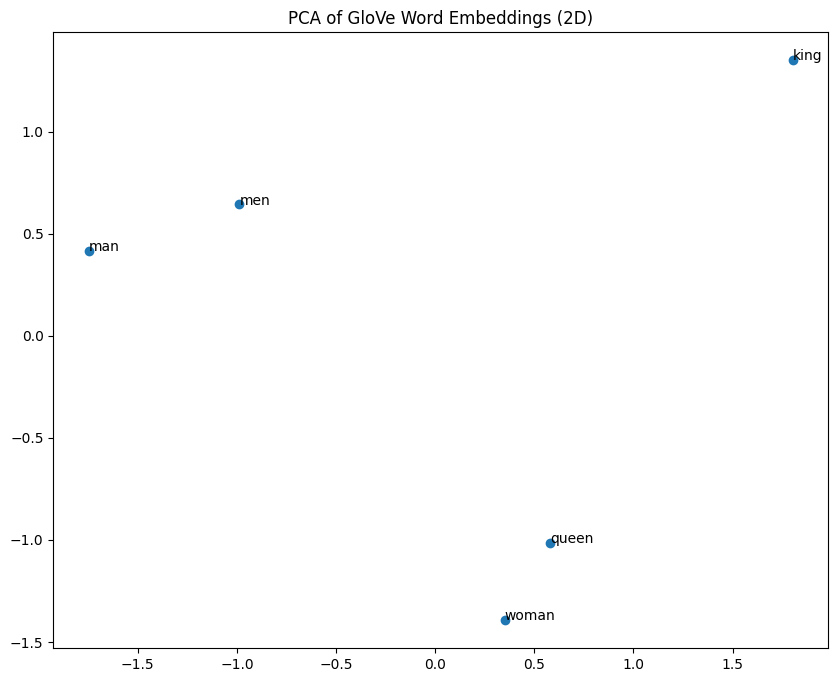

In [55]:
from glove import visualize_embeddings_with_pca
words_to_visualize = ["man", "men", "king", "queen", "woman"]
visualize_embeddings_with_pca(glove_model, words_to_visualize)

### 5.b

### As we can see, semantic related words vectors tend to be clustered together here, 'man' is the closest to 'men', as 'woman' to 'queen'. although it isnt significant. 